#Práctico 2: Feature Selection

##Librerías

In [61]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#from google.colab import drive, files

##Carga de datos

In [62]:
#drive.mount('/content/drive', force_remount=True)

df = pd.read_csv("eph2.txt", sep = ",")

##Análisis

In [63]:
len(df)

3516

In [130]:
a = 1
b = 2
c = a + b
c

3

In [126]:
df.head(10)

,edad,sexo,alfabeto,sistema_salud,nivel_educativo,ocupacion_jerarquia,estado_civil,ingreso_15k,edad_cat
0,23.0,hombre,Si,Obra social (incluye PAMI),Secundaria Completa,Director,3,no,"(14.999, 34.0]"
1,58.0,hombre,Si,Obra social (incluye PAMI),Superior Universitaria Completa,Cuenta propia,1,si,"(55.0, 95.0]"
2,27.0,mujer,Si,No paga ni le descuentan,Secundaria Completa,Cuenta propia,4,no,"(14.999, 34.0]"
3,32.0,hombre,Si,No paga ni le descuentan,Secundaria Incompleta,Cuenta propia,2,no,"(14.999, 34.0]"
4,65.0,hombre,Si,Obra social (incluye PAMI),Primaria Completa,Cuenta propia,1,no,"(55.0, 95.0]"
5,28.0,mujer,Si,Obra social (incluye PAMI),Superior Universitaria Incompleta,Cuenta propia,4,no,"(14.999, 34.0]"
6,40.0,hombre,No,No paga ni le descuentan,Primaria Incompleta(incluye educación especial),Cuenta propia,4,no,"(34.0, 44.0]"
7,43.0,mujer,No,No paga ni le descuentan,Primaria Incompleta(incluye educación especial),Cuenta propia,4,no,"(34.0, 44.0]"
8,42.0,hombre,Si,No paga ni le descuentan,Secundaria Incompleta,Cuenta propia,4,no,"(34.0, 44.0]"
9,NaN,mujer,Si,Obra social (incluye PAMI),Superior Universitaria Completa,Cuenta propia,2,no,NaN


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3516 entries, 0 to 3515
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   edad                 3382 non-null   float64
 1   sexo                 3516 non-null   object 
 2   alfabeto             3516 non-null   object 
 3   sistema_salud        3516 non-null   object 
 4   nivel_educativo      3450 non-null   object 
 5   ocupacion_jerarquia  3516 non-null   object 
 6   estado_civil         3516 non-null   int64  
 7   ingreso_15k          3516 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 219.9+ KB


In [66]:
df.estado_civil = df.estado_civil.astype('str')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3516 entries, 0 to 3515
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   edad                 3382 non-null   float64
 1   sexo                 3516 non-null   object 
 2   alfabeto             3516 non-null   object 
 3   sistema_salud        3516 non-null   object 
 4   nivel_educativo      3450 non-null   object 
 5   ocupacion_jerarquia  3516 non-null   object 
 6   estado_civil         3516 non-null   object 
 7   ingreso_15k          3516 non-null   object 
dtypes: float64(1), object(7)
memory usage: 219.9+ KB


In [68]:
df.describe()

,edad
count,3382.000000
mean,44.795387
std,13.400287
min,15.000000
25%,34.000000
50%,44.000000
75%,55.000000
max,95.000000


### Valores nulos

La función .isnull() nos indica con variables booleanas si hay valores nulos en cada celda del DataFrame.

In [69]:
df_aux = df.isnull()
df_aux

,edad,sexo,alfabeto,sistema_salud,nivel_educativo,ocupacion_jerarquia,estado_civil,ingreso_15k
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
3511,False,False,False,False,False,False,False,False
3512,False,False,False,False,False,False,False,False
3513,False,False,False,False,False,False,False,False
3514,False,False,False,False,False,False,False,False


Como vimos la clase pasada, si queremos revisar cual es la proporción de valores nulos

In [70]:
df.isnull().mean()

edad                   0.038111
sexo                   0.000000
alfabeto               0.000000
sistema_salud          0.000000
nivel_educativo        0.018771
ocupacion_jerarquia    0.000000
estado_civil           0.000000
ingreso_15k            0.000000
dtype: float64

La función any nos da False si y solo si todos los elementos del eje son False. Por defecto axis=0.

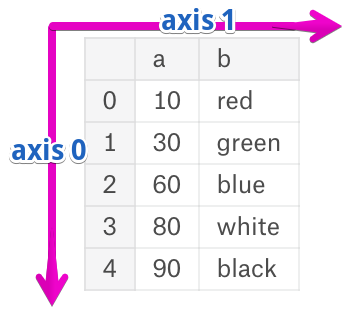

Con axis=0, los índices son los de las columnas.  
Con axis=1, los índices son los de las  filas.

####Ejercicio 1:  
¿Qué nos indican las siguientes 2 celdas de código?

In [71]:
df_aux.any()

edad                    True
sexo                   False
alfabeto               False
sistema_salud          False
nivel_educativo         True
ocupacion_jerarquia    False
estado_civil           False
ingreso_15k            False
dtype: bool

In [72]:
df_aux.any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
3511    False
3512    False
3513    False
3514    False
3515    False
Length: 3516, dtype: bool

####Ejercicio 2:  
Escriba el código necesario para mostrar solo aquellas líneas que contienen nulos, utilizando la función .any()

In [73]:
# Su código

Una forma de recorrer el DataFrame

In [74]:
count = 0
for i in range(len(df)):
  if df_aux.iloc[i].edad:
    count += 1
count

134

<AxesSubplot:>

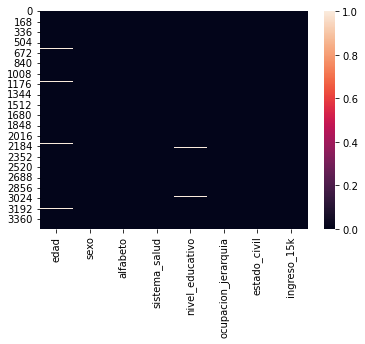

In [75]:
sns.heatmap(df.isnull())

Un poco de sintaxis de Seaborn:  

* Quitamos los valores de los labels en el eje vertical
* Mantenemos los lables en el eje horizontal
* Quitamos la barra de colores

<AxesSubplot:>

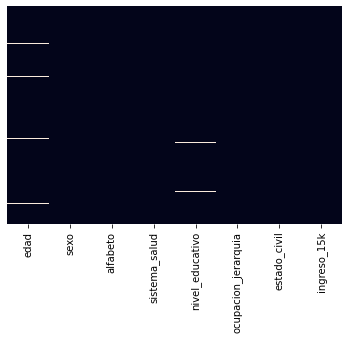

In [76]:
sns.heatmap(df.isnull(), cbar = False, yticklabels = False, xticklabels = True)

La idea del Heatmap es remplazar números con colores, para poder comprender visualmente agrupamientos, patrones, etc.

####Ejercicio 3:  
Remplace los valores nulos de edad (determine si es mejor utilizar la media o la mediana) y guárdelo en una nueva columna llamada "edad_2".

In [77]:
# Su código

Mostrar edades remplazadas

In [78]:
df[df.edad.isnull()]

,edad,sexo,alfabeto,sistema_salud,nivel_educativo,ocupacion_jerarquia,estado_civil,ingreso_15k
9,NaN,mujer,Si,Obra social (incluye PAMI),Superior Universitaria Completa,Cuenta propia,2,no
48,NaN,hombre,Si,Obra social (incluye PAMI),Superior Universitaria Incompleta,Cuenta propia,2,si
76,NaN,mujer,Si,Obra social (incluye PAMI),Superior Universitaria Completa,Director,1,no
139,NaN,mujer,Si,Obra social (incluye PAMI),Superior Universitaria Incompleta,Cuenta propia,2,no
210,NaN,hombre,Si,No paga ni le descuentan,Superior Universitaria Completa,Cuenta propia,2,no
...,...,...,...,...,...,...,...,...
3343,NaN,hombre,Si,Obra social (incluye PAMI),Primaria Completa,Cuenta propia,2,no
3439,NaN,hombre,Si,No paga ni le descuentan,Superior Universitaria Completa,Cuenta propia,1,no
3448,NaN,hombre,Si,No paga ni le descuentan,Primaria Completa,Cuenta propia,1,no
3467,NaN,hombre,Si,Obra social (incluye PAMI),Superior Universitaria Completa,Cuenta propia,1,si


Otro ejemplo utilizando fillna:  


NumPy nos permite crear valores nulos  
Vemos salto de línea en print

In [79]:
s = pd.Series([1, np.nan, 3, 4, np.nan, 7, np.nan, 9, np.nan])
print(s, "\n")
s2 = s.fillna(0)
print(s2)

0    1.0
1    NaN
2    3.0
3    4.0
4    NaN
5    7.0
6    NaN
7    9.0
8    NaN
dtype: float64 

0    1.0
1    0.0
2    3.0
3    4.0
4    0.0
5    7.0
6    0.0
7    9.0
8    0.0
dtype: float64


Otro ejemplo utilizando .fillna():  

Llenar los valores nulos con el ANTERIOR valor no nulo (se dice que los valores no nulos se han extendido hacia adelante).

In [80]:
s3 = s.fillna(method = "ffill")
print(s3)

0    1.0
1    1.0
2    3.0
3    4.0
4    4.0
5    7.0
6    7.0
7    9.0
8    9.0
dtype: float64


Otro ejemplo utilizando fillna:  

Llenar los valores nulos con el SIGUIENTE valor no nulo (se dice que los valores no nulos se han extendido hacia atras).


Nota: Si el ultimo valor es nulo, entonces quedara nulo, porque no existe valor siguiente no nulo con el cual rellenarlo.

In [81]:
s4 = s.fillna(method = "bfill")
print(s4)

0    1.0
1    3.0
2    3.0
3    4.0
4    7.0
5    7.0
6    9.0
7    9.0
8    NaN
dtype: float64


In [82]:
ventas = pd.DataFrame(
    {
        "A": [1, 5, 4, 7],
        "B": [3, 4, 1, np.nan],
        "C": [3, 7, 2, 6],
        "D": [np.nan, 2, 2, 3]
    },
    index = ["Ene", "Feb", "Mar", "Abr"])

ventas

,A,B,C,D
Ene,1,3.0,3,NaN
Feb,5,4.0,7,2.0
Mar,4,1.0,2,2.0
Abr,7,NaN,6,3.0


In [83]:
ventas2 = ventas.fillna(axis = 0, method = "ffill") # nos fijamos en filas
ventas2

,A,B,C,D
Ene,1,3.0,3,NaN
Feb,5,4.0,7,2.0
Mar,4,1.0,2,2.0
Abr,7,1.0,6,3.0


####Ejercicio 4:  
Utilizando .bfill(), rellene los valores nulos de ventas basándose en las columnas. Guarde los resultados en un nuevo DataFrame.

In [84]:
# Su código

Trabajando con nulos categóricos

In [85]:
df['nivel_educativo'] = df['nivel_educativo'].fillna(value = "nulo") 

### Discretización

.qcut() es una "función de discretización basada en cuantiles"  
Esto significa que qcut intenta dividir los datos subyacentes en contenedores (bins) de igual tamaño  
La función define los contenedores usando percentiles basados ​​en la distribución de los datos  

In [86]:
df['edad_cat'] = pd.qcut(df['edad'], q = 4)

In [87]:
df[['edad_cat','edad']]

,edad_cat,edad
0,"(14.999, 34.0]",23.0
1,"(55.0, 95.0]",58.0
2,"(14.999, 34.0]",27.0
3,"(14.999, 34.0]",32.0
4,"(55.0, 95.0]",65.0
...,...,...
3511,"(44.0, 55.0]",51.0
3512,"(44.0, 55.0]",48.0
3513,"(34.0, 44.0]",35.0
3514,"(34.0, 44.0]",44.0


In [88]:
df['edad'].describe()

count    3382.000000
mean       44.795387
std        13.400287
min        15.000000
25%        34.000000
50%        44.000000
75%        55.000000
max        95.000000
Name: edad, dtype: float64

In [89]:
len(df['edad'])

3516

In [90]:
df['edad_cat'].value_counts()

(34.0, 44.0]      878
(44.0, 55.0]      860
(14.999, 34.0]    849
(55.0, 95.0]      795
Name: edad_cat, dtype: int64

In [91]:
df['edad_cat'].value_counts().sum()

3382

NOTA: Como se puede ver, edad tiene 3516 valore, pero solo vemos 3382 porque no se están considerando los valores nulos que son 134.

Otro modo de contar la cantidad de registros en cada bin, usando la funcion .countplot() que ya vimos en el practico anterior:

<AxesSubplot:xlabel='edad_cat', ylabel='count'>

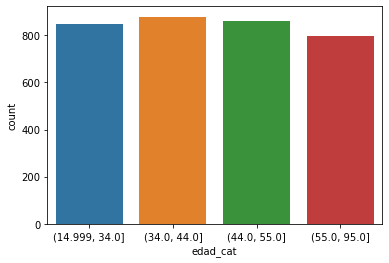

In [92]:
sns.countplot(data = df, x = 'edad_cat')

.cut() es una "función de discretización que busca que los rangos sean iguales"  
No importa cuantos datos tiene cada rango

####Ejercicio 5:  
Utilizando la función .cut(), cree una nueva variable llamada "edad_cat_2", dividiendo en 4 rangos. Compare los resultados contra los anteriormente obtenidos con .qcut().

In [93]:
# Su código

### Correlación

In [94]:
# Carga de los datos (desde drive)
#drive.mount('/content/drive', force_remount=True)

df_credit_data = pd.read_csv("credit_data.csv", sep = ",")

In [95]:
df_credit_data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,1,own,NaN,little,1169,6,domestic appliances,good
1,22,female,1,own,little,moderate,5951,48,domestic appliances,bad
2,49,male,3,own,little,NaN,2096,12,(vacation - does not exist?),good
3,45,male,1,for free,little,little,7882,42,radio/television,good
4,53,male,1,for free,little,little,4870,24,car (new),bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,3,own,little,NaN,1736,12,radio/television,good
996,40,male,0,own,little,little,3857,30,car (used),good
997,38,male,1,own,little,NaN,804,12,domestic appliances,good
998,23,male,1,for free,little,little,1845,45,domestic appliances,bad


La función .corr() se utiliza para encontrar la correlación de a pares de todas las columnas del DataFrame. Los nulos se excluyen. Las columnas no numéricas se excluyen.

In [96]:
d_cor = df_credit_data.corr()
d_cor

,Age,Job,Credit amount,Duration
Age,1.000000,-0.001637,0.032716,-0.036136
Job,-0.001637,1.000000,-0.261139,-0.215438
Credit amount,0.032716,-0.261139,1.000000,0.624984
Duration,-0.036136,-0.215438,0.624984,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

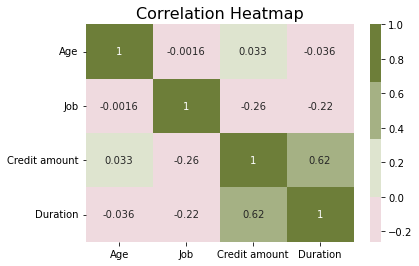

In [97]:
cmap = sns.diverging_palette(0, 100, sep = 20)
# el primer parametro (0) indica los colores para los valores mas bajos (si la correlacion fuera de -1 en algun caso, estaria en rojo oscuro)
# el segundo parametro (100) indica los colores para los valores mas altos (para correlacion 1 queda en verde oscuro)
# el parametro "sep" establece la separacion entre el rango de colores que se aclara y el rango de colores que se oscurece


sns.heatmap(d_cor, annot = True, cmap = cmap, center = 0).set_title("Correlation Heatmap", fontsize = 16)
# heatmap recibe los datos, la paleta de colores
# annot = Si esta en "True", pone el valor en cada celda de la matriz de correlacion 
# center = el valor en donde centrar el cambio de color (en este caso tenemos valores que van entre -1 y 1, por lo cual, marcamos 0 para el cambio de color). 
# Desde el centro hacia cada costado en igual medida, se marca el blanco segun la cantidad "sep"

Veamos cómo se ven las variables en un ScatterPlot

Dos variables nada correlacionadas

<AxesSubplot:xlabel='Age', ylabel='Credit amount'>

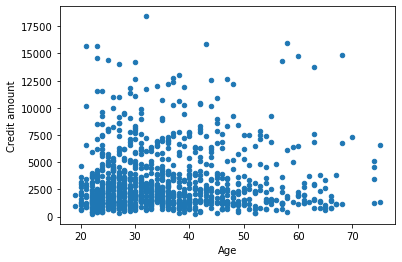

In [98]:
df_credit_data.plot.scatter(x = 'Age', y = 'Credit amount')

Dos variables un poco correlacionadas (+)

<AxesSubplot:xlabel='Duration', ylabel='Credit amount'>

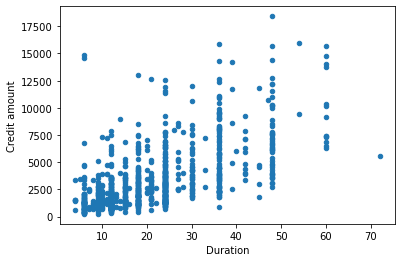

In [99]:
df_credit_data.plot.scatter(x = 'Duration', y = 'Credit amount')

NOTA: Tener en cuenta que no pasamos JOB a categórica

### One hot encoding

In [100]:
# Un vector one hot esta compuesto por elementos en cero para los valores que no nos interesan, y unos para los que si. 
df_credit_data_2 = pd.get_dummies(df_credit_data)

# Creación de variables dummies para cada variable categórica. 
# Al aplicar la funcion "get_dummies" estamos generando vectores one hot para cada categoria de las variables que son categoricas

In [101]:
df_credit_data_2

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_for free,Housing_own,Housing_rent,Saving accounts_little,...,Purpose_car (new),Purpose_car (used),Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/television,Purpose_repairs,Purpose_retraining,Risk_bad,Risk_good
0,67,1,1169,6,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,22,1,5951,48,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
2,49,3,2096,12,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,45,1,7882,42,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,53,1,4870,24,0,1,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,3,1736,12,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
996,40,0,3857,30,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
997,38,1,804,12,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
998,23,1,1845,45,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [102]:
df_credit_data_2.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Sex_female ', 'Sex_male ',
       'Housing_for free', 'Housing_own', 'Housing_rent',
       'Saving accounts_little', 'Saving accounts_moderate',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Checking account_little', 'Checking account_moderate',
       'Checking account_rich', 'Purpose_(vacation - does not exist?)',
       'Purpose_business', 'Purpose_car (new)', 'Purpose_car (used)',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/television',
       'Purpose_repairs', 'Purpose_retraining', 'Risk_bad', 'Risk_good'],
      dtype='object')

In [103]:
df_credit_data_2[['Sex_female ', 'Sex_male ']]

,Sex_female,Sex_male
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
995,1,0
996,0,1
997,0,1
998,0,1


Hacemos lo mismo pero eliminando la primer categoria (por ejemplo, para sex, nos quedamos solo con la categoria "male". Si sex_male = 0, entonces es sex_female).

In [104]:
df_credit_data_3 = pd.get_dummies(df_credit_data, drop_first = True)

In [105]:
df_credit_data_3

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,...,Purpose_business,Purpose_car (new),Purpose_car (used),Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/television,Purpose_repairs,Purpose_retraining,Risk_good
0,67,1,1169,6,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,22,1,5951,48,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,49,3,2096,12,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,45,1,7882,42,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,53,1,4870,24,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,3,1736,12,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
996,40,0,3857,30,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
997,38,1,804,12,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
998,23,1,1845,45,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


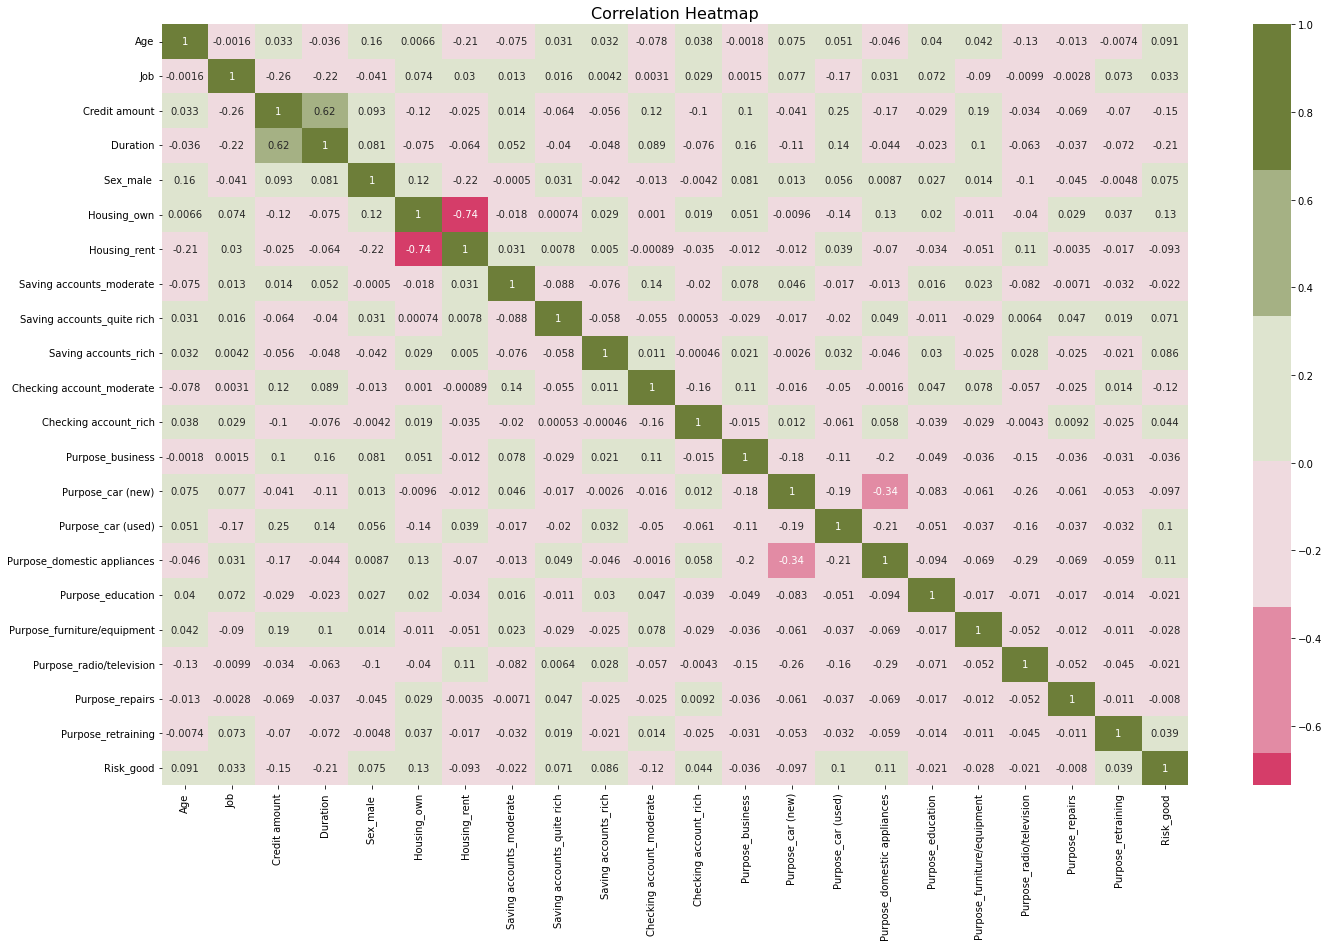

In [106]:
# Matriz de correlación
plt.figure(figsize = (23, 14))
cmap = sns.diverging_palette(0, 100, sep = 20)
sns.heatmap(df_credit_data_3.corr(), annot = True, cmap = cmap, center = 0).set_title("Correlation Heatmap", fontsize = 16)
plt.show()

Se elimina alguna de las variables altamente correlacionadas. "Housing_rent" esta bastante correlacionado con "Housing_own".

In [107]:
df_credit_data_3 = df_credit_data_3.drop(columns = ['Housing_rent'])

In [108]:
df_credit_data_3

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,...,Purpose_business,Purpose_car (new),Purpose_car (used),Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/television,Purpose_repairs,Purpose_retraining,Risk_good
0,67,1,1169,6,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,22,1,5951,48,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,49,3,2096,12,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,45,1,7882,42,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,53,1,4870,24,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,3,1736,12,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
996,40,0,3857,30,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
997,38,1,804,12,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
998,23,1,1845,45,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Otra forma de hacer OHE

In [109]:
from sklearn.preprocessing import OneHotEncoder

housing_OHE = OneHotEncoder(handle_unknown='ignore')
housing = housing_OHE.fit_transform(df_credit_data["Housing"].to_numpy().reshape(-1, 1))
housing = housing.toarray()

In [110]:
housing

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [111]:
housing_OHE.inverse_transform([[0., 1., 0.]])

array([['own']], dtype=object)

In [112]:
housing_OHE.inverse_transform([[0., 0., 1.]])

array([['rent']], dtype=object)

### Feature Scaling

#### MinMaxScaler

In [113]:
scaler = MinMaxScaler(feature_range = (0, 1)) # indico el rango objetivo

In [114]:
norm = scaler.fit_transform(df_credit_data_3)

NOTA: Con el scaler podemos hacer .fit() y luego .transform(). El .fit() crea un objeto entrenado para los datos, y el .transform() crea el ndarray. Esto es importante cuando hagamos separación de datos en train, val, test.

In [115]:
type(norm)

numpy.ndarray

In [116]:
norm

array([[0.85714286, 0.33333333, 0.05056674, ..., 0.        , 0.        ,
        1.        ],
       [0.05357143, 0.33333333, 0.31368989, ..., 0.        , 0.        ,
        0.        ],
       [0.53571429, 1.        , 0.10157368, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.33928571, 0.33333333, 0.03048311, ..., 0.        , 0.        ,
        1.        ],
       [0.07142857, 0.33333333, 0.08776274, ..., 0.        , 0.        ,
        0.        ],
       [0.14285714, 0.33333333, 0.23803235, ..., 0.        , 0.        ,
        1.        ]])

In [117]:
df_norm = pd.DataFrame(norm, columns = df_credit_data_3.columns)

In [118]:
df_norm

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,...,Purpose_business,Purpose_car (new),Purpose_car (used),Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/television,Purpose_repairs,Purpose_retraining,Risk_good
0,0.857143,0.333333,0.050567,0.029412,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.053571,0.333333,0.313690,0.647059,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.535714,1.000000,0.101574,0.117647,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.464286,0.333333,0.419941,0.558824,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.607143,0.333333,0.254209,0.294118,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.214286,1.000000,0.081765,0.117647,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
996,0.375000,0.000000,0.198470,0.382353,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
997,0.339286,0.333333,0.030483,0.117647,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
998,0.071429,0.333333,0.087763,0.602941,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### StandardScaler

Estandarizar es restar la media a la variable y dividir por la desviación estandar. Se obtiene una distribucion de media cero, y desvio estandar uno.

La estandarización de un conjunto de datos es un requisito común para muchos estimadores de aprendizaje automático. Estos podrian comportarse mal si las features individuales no se ven más o menos como datos estándar distribuidos normalmente (por ejemplo, gaussiano con media 0 y varianza unitaria).

Muchos elementos utilizados en la función objetivo de un algoritmo de aprendizaje (como los regularizadores L1 y L2 de modelos lineales) asumen que todas las features se centran alrededor de 0 y tienen varianza en el mismo orden. Si una feature tiene una varianza que es de orden de magnitud mayor que otras, podría dominar a la función objetivo y hacer que el estimador no pueda aprender de otras features correctamente como se esperaba.

#####Ejercicio 6:  
Investigar acerca del uso de StandardScaler, aplicarlo y crear un nuevo df a partir de df_credit_data_3 con los valores normalizados

In [119]:
# Su código

#####Ejercicio 7:  
Ejecute el proceso de StandardScaler de manera manual para el primer valor de la variable Age. Compare resultados.

In [120]:
# Su código

Antes:

c:\Users\crist\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

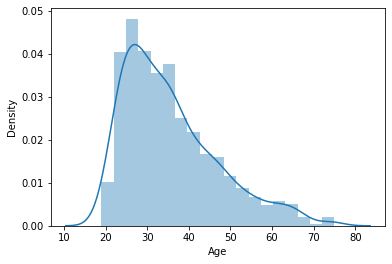

In [121]:
sns.distplot(df_credit_data_3.Age)

Después:

In [122]:
sns.distplot(df_std.Age)

NameError: name 'df_std' is not defined